In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH_RAW = '../data/raw_data/'
PATH_DATA = '../data/data/'
PATH_IMAGES = '../assets/images/'

## Training data

In [3]:
train = pd.read_csv(PATH_DATA + "2829_train.csv")
val_train = train['tag'].value_counts().sort_index()

## Test data

#### 4 categories

In [4]:
# Amazon test set from my collected data set
test_amazon = pd.read_csv(PATH_DATA + "2829_test.csv")
val_test_amazon = test_amazon['tag'].value_counts().sort_index()

#### 2 categories

In [8]:
# SOCC from SFU Discourse lab (to be extended soon)
test_socc = pd.read_csv(PATH_DATA + "SOCC.csv")
test_socc['is_constructive'] = test_socc.loc[:, 'is_constructive'].map({'no': '0',
                                                                      'yes': '1'})
val_test_socc = test_socc['is_constructive'].value_counts().sort_index()

In [32]:
# Amazon test set from my collected data set
val_test_amazon_bin = test_amazon['bin_tag'].value_counts().sort_index()

## Plotting

In [33]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)], edgecolor='black', linewidth=0.2)

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

In [42]:
x = np.arange(4)
x_bin = np.arange(2)

width = 0.35
width_test = 0.2

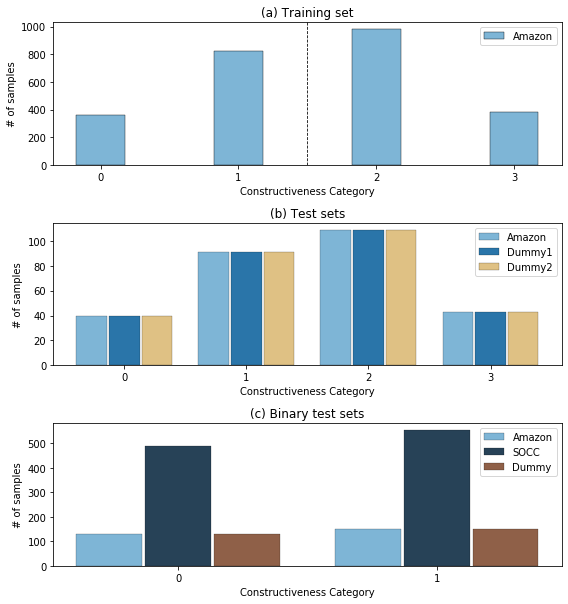

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8.5))

bar1 = ax1.bar(x, val_train, width, color='#7EB5D6', edgecolor='black', linewidth=0.4, label='Amazon')

colors = ['#7EB5D6', '#2A75A9', '#DFC184']
bar_plot(ax2, {'Amazon': val_test_amazon, 'Dummy1': val_test_amazon, 'Dummy2': val_test_amazon}, colors=colors, single_width=0.95)

colors_bin = ['#7EB5D6', '#274257', '#8F6048']
bar_plot(ax3, {'Amazon': val_test_amazon_bin, 'SOCC': val_test_socc, 'Dummy': val_test_amazon_bin}, colors=colors_bin, single_width=0.95)


ax1.axvline(1.5, c='black', linestyle='--', linewidth=0.8)
ax1.set_ylabel('# of samples')
ax1.set_xlabel('Constructiveness Category')

ax1.set_xticks(x)
ax1.set_xticklabels(x)
ax1.set_title('(a) Training set')
ax1.legend()

# ax2.axvline(1.5, c='black', linestyle='--', linewidth=0.9)
ax2.set_ylabel('# of samples')
ax2.set_xlabel('Constructiveness Category')
ax2.set_title('(b) Test sets')

ax2.set_xticks(x)
ax2.set_xticklabels(x)

# ax3.axvline(1.5, c='black', linestyle='--', linewidth=0.9)
ax3.set_ylabel('# of samples')
ax3.set_xlabel('Constructiveness Category')
ax3.set_title('(c) Binary test sets')

ax3.set_xticks(x_bin)
ax3.set_xticklabels(x_bin)


fig.tight_layout()

fig.savefig(PATH_IMAGES + 'data_distrib.png', format='png', dpi=300, bbox_inches='tight')
plt.show()